In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import glob, os

path_name = "/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/*.csv"

all_files = glob.glob(path_name)
print(all_files)

df_list = []

for filename in all_files:
    df = pd.read_csv(filename)
    df_list.append(df)

df_concat = pd.concat(df_list, axis=0, ignore_index=True)

['/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Iota.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Cardano.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_ChainLink.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_EOS.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_CryptocomCoin.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_BinanceCoin.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Bitcoin.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Aave.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Dogecoin.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Litecoin.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_Ethereum.csv', '/content/drive/MyDrive/Data analytics course/Crypto Hist Prices/coin_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Random Sampling

Actual Mean: 4852.092547
Sample Mean: 4753.132079
Sample Error: 98.960468


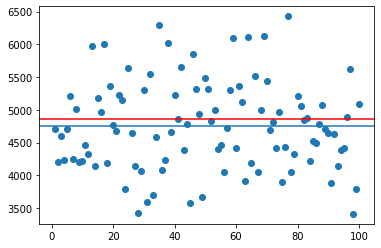

In [ ]:
df_concat_btc = df_concat[df_concat.Symbol == "BTC"]

sample_means = []
population_mean = df_concat_btc["Close"].mean()
sample_size = 100

for i in range(sample_size):
    # we use the sample function to take n samples, random state is a seed parameter to generate pseudo randomn numbers
    sample = df_concat_btc["Close"].sample(sample_size, random_state=i)
    sample_means.append(sample.mean())

plt.scatter(range(1,sample_size+1), sample_means)

# Plots our actual mean
plt.axhline(population_mean, color="red")

# Plots the mean of our sample size
sample_size_mean = np.array(sample_means).mean()
plt.axhline(sample_size_mean)

print("Actual Mean: %2f" % (population_mean))
print("Sample Mean: %2f" % (sample_size_mean))
print("Sample Error: %2f" % (population_mean-sample_size_mean))

# Stratified Random

In [ ]:
df_concat.Symbol.value_counts()

LTC      2862
BTC      2862
XRP      2764
DOGE     2631
XMR      2473
XLM      2398
USDT     2189
XEM      2159
ETH      2031
MIOTA    1355
EOS      1337
BNB      1313
TRX      1263
LINK     1256
ADA      1245
USDC      873
CRO       806
WBTC      759
ATOM      716
SOL       323
DOT       191
UNI       163
AAVE      146
Name: Symbol, dtype: int64

In [ ]:
strata_btc = df_concat[df_concat.Symbol == "BTC"]
strata_ltc = df_concat[df_concat.Symbol == "LTC"]
strata_eth = df_concat[df_concat.Symbol == "ETH"]

In [ ]:
print(f" BTC:{len(strata_btc)}\n LTC:{len(strata_ltc)}\n ETH:{len(strata_eth)}\n")

 BTC:2862
 LTC:2862
 ETH:2031



In [ ]:
crypto_mean_per_symbol = {}

for strata, crypto_symbol in [(strata_btc, "BTC"), (strata_ltc, "LTC"), (strata_eth, "ETH")]:
  sample = strata["Close"].sample(100)
  crypto_mean_per_symbol[crypto_symbol] = sample.mean()

print(crypto_mean_per_symbol)

{'BTC': 5573.563621585339, 'LTC': 52.790520492387905, 'ETH': 238.60016949116485}




---



Q 10.1 Identify which of techniques gives better result - Random vs. Stratified Random for BTC, LTC and ETH cryptocurrencies.

In [ ]:
population_mean_BTC = strata_btc["Close"].mean()
population_mean_LTC = strata_ltc["Close"].mean()
population_mean_ETH = strata_eth["Close"].mean()
population_mean_all = df_concat["Close"].mean()

In [ ]:
sample_means = []
sample_size = 100

for i in range(sample_size):
    sample = df_concat["Close"].sample(sample_size, random_state=i)
    sample_means.append(sample.mean())

sample_size_mean = np.array(sample_means).mean()
sample_size_mean

668.0634062776651

In [ ]:
#jāparāda atškirība no population mean BTC - sample mean (no sākuma ar random variantu, pēc tam no stratify mainīgajiem)



---



# Mean, Mode, Median

Let's create **Mode** function

In [ ]:
def getMode(dataframe, feature):
  return dataframe[feature].value_counts().index[0]

In [ ]:
getMode(df_concat_btc, "Close")

111.5

Let's check what indeed our *getMode()* function returns.

In [ ]:
df_concat_btc['Close'].value_counts()

111.500000     3
129.000000     3
104.000000     3
6741.750000    2
108.300003     2
              ..
4565.299805    1
442.725006     1
9081.762851    1
919.750000     1
139.000000     1
Name: Close, Length: 2849, dtype: int64

Mode can be applied for numerical values as well categorical.

In [ ]:
getMode(df_concat, "Symbol")

'LTC'

Next, let's proceed to **median**.

In [ ]:
df_concat.median()

SNo          8.730000e+02
High         1.004951e+00
Low          9.973550e-01
Open         1.000010e+00
Close        1.000010e+00
Volume       6.022010e+07
Marketcap    1.120902e+09
dtype: float64

In [ ]:
x = df_concat[df_concat.Symbol == "BTC"]["Close"].median()
y = df_concat[df_concat.Symbol == "BTC"]["Close"].median()
z = getMode(df_concat_btc, "Close")

And all together.

In [ ]:
print(f" Mean = {x}")
print(f"Median = {y}")
print(f"Mode = {z}")

 Mean = 1182.8099975585938
Median = 1182.8099975585938
Mode = 111.5


**Variance and Standard Deviation**

Mean is 4852.092546700425
STD is 6975.105868590156


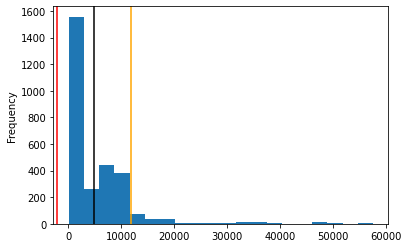

In [ ]:
mean = df_concat_btc['Close'].mean()
stdev = df_concat_btc['Close'].std()

df_concat_btc['Close'].plot.hist(bins=20)

plt.axvline(mean, color="Black", label="Mean")
plt.axvline(mean - stdev, color="Red", label="Lower")
plt.axvline(mean + stdev, color="Orange", label="Upper")

print("Mean is " + str(mean))
print("STD is " + str(stdev))

Mean is 4852.092546700425
Variance is 48635102.54125606


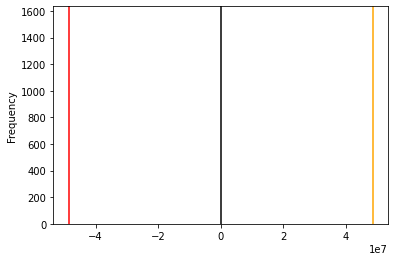

In [ ]:
mean = df_concat_btc['Close'].mean()
var= df_concat_btc['Close'].var(ddof=0)

df_concat_btc['Close'].plot.hist(bins=20)

plt.axvline(mean, color="Black", label="Mean")
plt.axvline(mean - var, color="Red", label="Lower")
plt.axvline(mean + var, color="Orange", label="Upper")

print("Mean is " + str(mean))
print("Variance is " + str(var))

# Bessel's Correction

Another words: calculation for *sample* and calculation for *population*. 

*N-1* as a devider is as well called *unbaised estimator*.

In [ ]:
lis = [10, 11, 3, 12, 10, 11, 190]
df = pd.DataFrame(lis, columns=['num'])

print("Mean - ", df.num.mean())
print("Unbiased - ", df.num.var())
print("Biased - ", df.num.var(ddof=0))

Mean -  35.285714285714285
Unbiased -  4663.238095238095
Biased -  3997.061224489796


Warne (in *Warne, T. (2017). Statistics for the Social Sciences: A General Linear Model Approach. Cambridge University press.*) advocates using Bessel’s correction only if you have a sufficiently large sample and if you are actually trying to approximate the population mean. If you’re just interested in finding the sample mean, and don’t want to extrapolate your findings to the population, just omit the correction.

# Covariance & Correlation

**Covariance**

*Covariance measures how changes in one variable affect other – relationship between variability of 2 variables*

In [ ]:
height = [185, 172, 188, 180]
weight = [109, 73, 96, 99]

df = pd.DataFrame(list(zip(height, weight)), columns = ["Height", "Weight"]) #noskaidrot ko zip dara

df

,Height,Weight
0,185,109
1,172,73
2,188,96
3,180,99


There are two options, how to run covariance calculation:


1.   For whole Dataframe
2.   Among two selected columns

**Covariance calculation for whole Dataframe**

In [ ]:
df.cov(ddof=0)

,Height,Weight
Height,36.6875,64.4375
Weight,64.4375,173.6875


**Covariance calculation between two colums**

In [ ]:
df.Height.cov(df.Weight, ddof=0) #ddof = 0, lai nebūtu n-1 correction

64.4375



---


**Q 10.02** - Building raltionship between two variables

Create visulalization of relationship between Weight and Height of people in data-set (*weight-height.csv*)

What you can conclude from what you see? Why?

In [ ]:
weight_height_name = "/content/drive/MyDrive/Data analytics course/weight-height.csv"
wh_df = pd.read_csv(weight_height_name)
wh_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


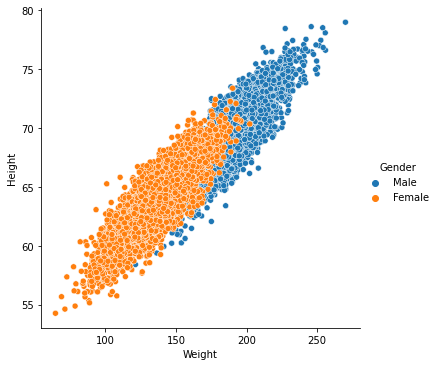

In [ ]:
sns.relplot(x="Weight", y="Height", hue="Gender", data=wh_df);



---



**Correlation**

*Normalization* is a technique used during claculation of Correlation

In [ ]:
def normalize(df):
  result = df.copy()
  for feature in df.columns: #feautuew kā kolonna
    min_value = df[feature].min()
    max_value = df[feature].max()
    result[feature] = (df[feature] - min_value)/(max_value - min_value)
  return result

In [ ]:
df

,Height,Weight
0,185,109
1,172,73
2,188,96
3,180,99


In [ ]:
normalize(df)

,Height,Weight
0,0.8125,1.000000
1,0.0000,0.000000
2,1.0000,0.638889
3,0.5000,0.722222


For **Correlation** example let's use the same data-set of weights/hights.

**Correlation calculation for whole Dataframe**

In [ ]:
df.corr()

,Height,Weight
Height,1.000000,0.807226
Weight,0.807226,1.000000


**Correlation calculation between two colums**

In [ ]:
df.Weight.corr(df.Height)

0.8072263709883305

# Correlation Matrix

*Correlation if positive shows that two variables are moving in one direction (going high or low) in the same time and can be expressed lineary.* 

*If Correlation is negative - it means two variables are moving in different directions, e.g. one goes up, second goes down.*

Next topic for us to consider is Correlation Matrix. It is needed to see on one chart all variables and strength of correlation between vatriables in data-set.

For simplicity reason we will use Iris data-set and Telco Churn data-set to observer correlation matrix.

In [ ]:
iris_file = "/content/drive/MyDrive/Data analytics course/Iris.csv"
iris_df = pd.read_csv(iris_file)
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


To observe Correlation Matrix we can use *corr()* function.

In [ ]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Seems that some variables are quite correlated. However people eye isn't good to comprehend tabular data so well. We need visualization for that. Let's see how Correlation Matrix looks in visual.

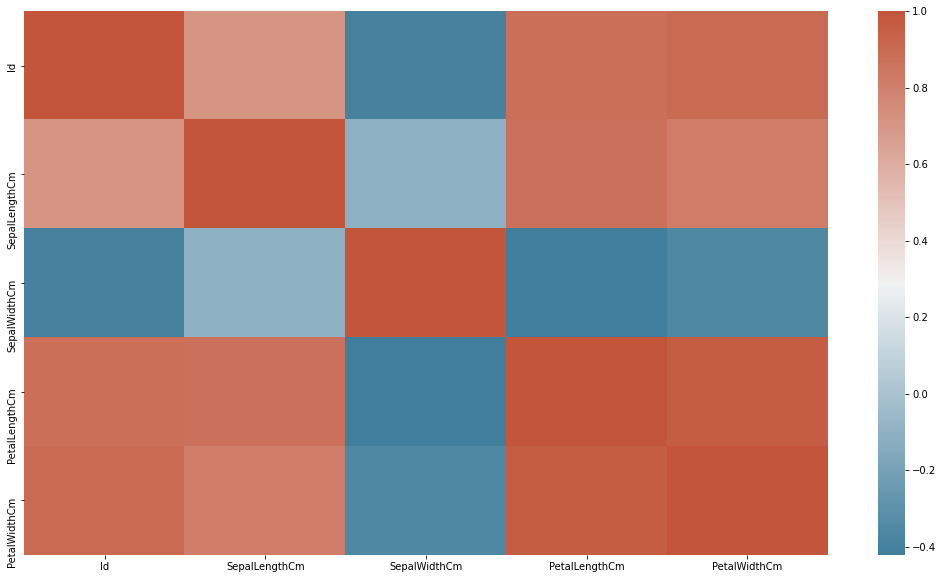

In [ ]:
plt.figure(figsize=(18, 10))

sns.heatmap(iris_df.corr(), cmap=sns.diverging_palette(230, 20, as_cmap=True))

**Pairlots** - is another good example how to analyze correlation matrix results.

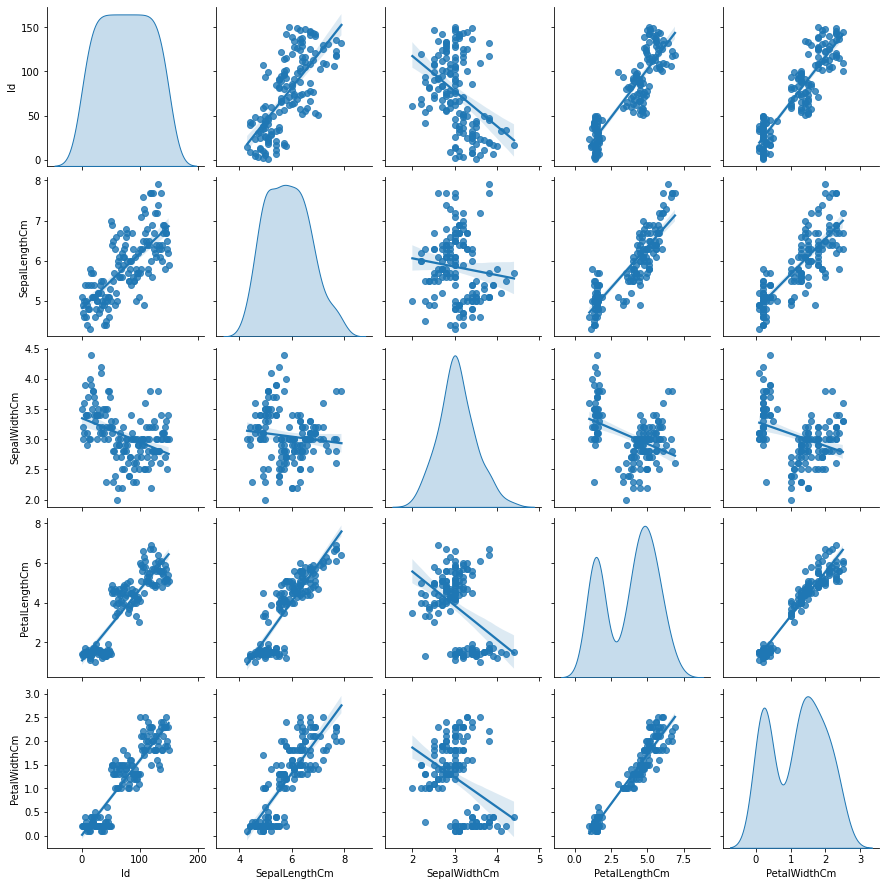

In [ ]:
sns.pairplot(iris_df, palette="husl", diag_kind="kde", kind="reg")

For next example we will use Telco Customer Churn data-set for it downloaded from Kaggle. 

Moreover, you'll see some steps of loading and preparing data here.

**Step 1.** Load Telco Customer Churn data-set

In [ ]:
telco_file = "/content/drive/MyDrive/Data analytics course/WA_Fn-UseC_-Telco-Customer-Churn.csv"
telcoChurn_df = pd.read_csv(telco_file)
telcoChurn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Step 2.** Build Correlation Matrix

In [ ]:
telcoChurn_df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


Wow! Only three variables are shown! Why?

**Step 3.** Apply transformations. 

E.g. - check for data types of all variables in dataset

In [ ]:
telcoChurn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Ah! Only three variables are of numeric data type.

Let's convert more variables to numeric format. For instance we can convert *'Yes' to 1*; *'No' to 0*; *'Male' to 1* and *'Female' to 0*

In [ ]:
telcoChurn_df["Churn"] = telcoChurn_df["Churn"].map({"Yes":1, "No": 0})
telcoChurn_df["gender"] = telcoChurn_df["gender"].map({"Male":1, "Female": 0})

telcoChurn_df.corr()

,gender,SeniorCitizen,tenure,MonthlyCharges,Churn
gender,1.000000,-0.001874,0.005106,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016567,0.220173,0.150889
tenure,0.005106,0.016567,1.000000,0.247900,-0.352229
MonthlyCharges,-0.014569,0.220173,0.247900,1.000000,0.193356
Churn,-0.008612,0.150889,-0.352229,0.193356,1.000000


Ok, seems inside Churn - Contract (and tenure) some negative correlation exists. Let's check in more details via engineering more features.

**Step 4.** Feature Engineering

We shall split categorical variable of Contract into two new vectors - One Year and Month-to-month contracts.

In [ ]:
telcoChurn_df["One_year"] = np.where(telcoChurn_df["Contract"] == "One year", 1, 0)
telcoChurn_df["Month-to-month"] = np.where(telcoChurn_df["Contract"] == "Month-to-month", 1, 0)

telcoChurn_df.describe()

,gender,SeniorCitizen,tenure,MonthlyCharges,Churn,One_year,Month-to-month
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,32.371149,64.761692,0.265370,0.209144,0.550192
std,0.500013,0.368612,24.559481,30.090047,0.441561,0.406726,0.497510
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,35.500000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,29.000000,70.350000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,55.000000,89.850000,1.000000,0.000000,1.000000
max,1.000000,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000


Back to Step 2. Re-build Correlation Matrix


In [ ]:
telcoChurn_df.corr()

,gender,SeniorCitizen,tenure,MonthlyCharges,Churn,One_year,Month-to-month
gender,1.000000,-0.001874,0.005106,-0.014569,-0.008612,0.008026,-0.003386
SeniorCitizen,-0.001874,1.000000,0.016567,0.220173,0.150889,-0.046262,0.138360
tenure,0.005106,0.016567,1.000000,0.247900,-0.352229,0.202570,-0.645561
MonthlyCharges,-0.014569,0.220173,0.247900,1.000000,0.193356,0.004904,0.060165
Churn,-0.008612,0.150889,-0.352229,0.193356,1.000000,-0.177820,0.405103
One_year,0.008026,-0.046262,0.202570,0.004904,-0.177820,1.000000,-0.568744
Month-to-month,-0.003386,0.138360,-0.645561,0.060165,0.405103,-0.568744,1.000000


This representations seems nice, but a lot of attention to numbers is needed to comprehend the data. There shall be better way to see intuition from Correlation Matrix.

**Step 2.a.** Visualize Correlation Matrix.

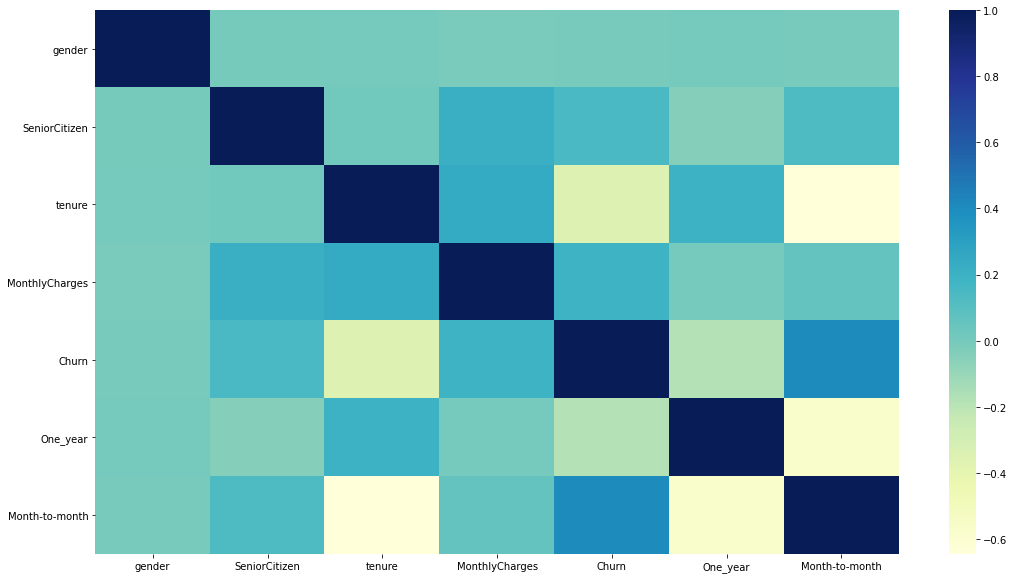

In [ ]:
plt.figure(figsize=(18,10))

sns.heatmap(telcoChurn_df.corr(), cmap="YlGnBu")

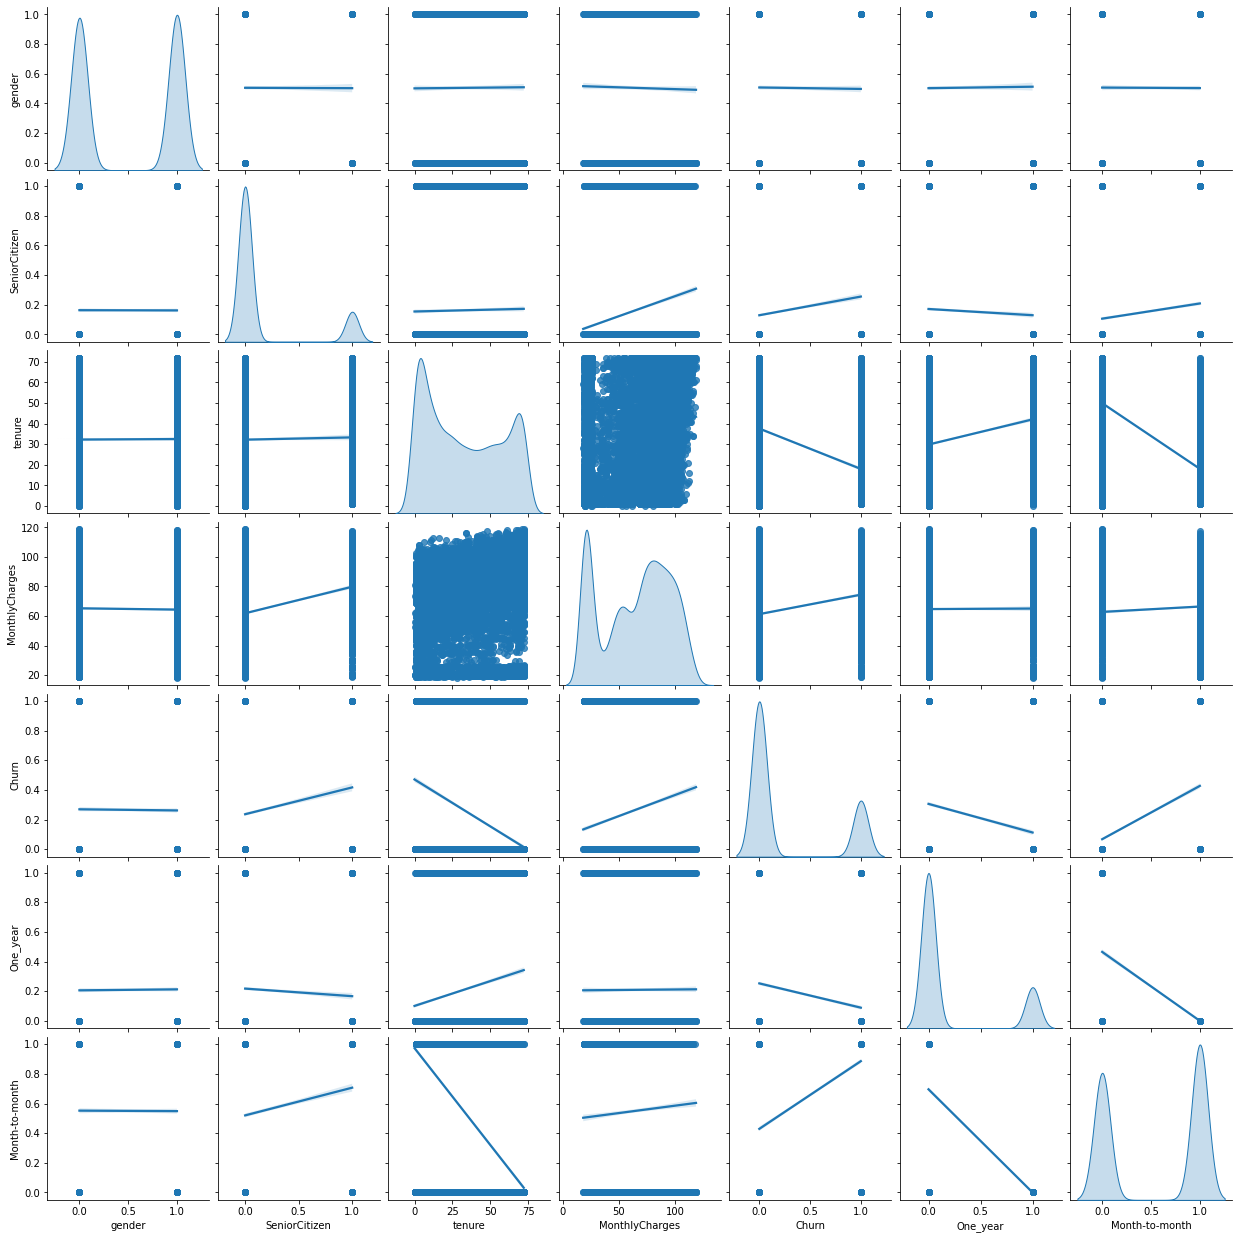

In [ ]:
sns.pairplot(telcoChurn_df, palette="husl", diag_kind="kde", kind='reg')